# Welcome to pandas demo

### by Jozef Karabelly


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import string
from datetime import time

%matplotlib inline
AAPL_PATH = './data/NASDAQ_AAPL.txt'
PATH = './data/%s.csv'

def load_bars(ticker):
    bars = pd.read_csv(PATH % ticker)
    bars.index = pd.to_datetime(bars.pop('Date'))
    return bars

def subsample(frame, pct=.9):
    N = len(frame)
    indexer = np.sort(np.random.permutation(N)[:int(pct*N)])
    return frame.take(indexer)

def rands(n):
    choices = string.ascii_letters
    return ''.join([random.choice(choices) for _ in range(n)])

tsla_bars = load_bars('TSLA')
ind_names = np.array(['ENERGY', 'FINANCIAL', 'TECH', 'CONSDUR', 'SERVICES', 'UTILITIES'], dtype='O')
ccys = np.array(['USD', 'EUR'], dtype='O')
Nfull = 2000
tickers = np.array(sorted(rands(5).upper() for _ in range(Nfull)), dtype='O')
tickers = np.unique(tickers)

industries = pd.Series(ind_names.take(np.random.randint(0, 6, Nfull)), index=tickers, name='industry')
ccy = pd.Series(ccys.take(np.random.randint(0, len(ccys), Nfull)), index=tickers, name='ccy')
zscore = lambda x: (x - x.mean()) / x.std()

base = './data/movielens'
get_path = lambda x: f'{base}/{x}.dat'

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv(get_path('users'), sep='::', names=unames, header=None)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv(get_path('ratings'), sep='::', names=rnames, header=None)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_csv(get_path('movies'), sep='::', names=mnames, header=None)

/home/jkarabelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/jkarabelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/jkarabelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


<div align="center">
  <img src="https://dev.pandas.io/static/img/pandas.svg" width="300px"><br>
</div>


# What is pandas?

# Main features
* Time series functionality
* Data alignment
* Missing data
* Groupby operation
* Merging and joining
* Data summary


## Load tabular data

In [2]:
aapl = pd.read_csv(AAPL_PATH)
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 7 columns):
Ticker    2014 non-null object
Date      2014 non-null int64
Open      2014 non-null float64
High      2014 non-null float64
Low       2014 non-null float64
Close     2014 non-null float64
Vol       2014 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 110.2+ KB


## Time series operations

In [3]:
aapl.index = pd.to_datetime(aapl.pop('Date'), format='%Y%m%d%H%M')
aapl.head()

,Ticker,Open,High,Low,Close,Vol
Date,,,,,,
2010-10-11 09:00:00,AAPL,295.01,295.05,294.82,294.82,5235
2010-10-11 09:05:00,AAPL,294.81,294.90,294.80,294.85,7441
2010-10-11 09:10:00,AAPL,294.85,294.98,294.84,294.85,4268
2010-10-11 09:15:00,AAPL,294.83,294.83,294.75,294.83,4012
2010-10-11 09:20:00,AAPL,294.80,294.82,294.64,294.67,13081


In [4]:
aapl.at_time(time(15, 0)).head(10)

,Ticker,Open,High,Low,Close,Vol
Date,,,,,,
2010-10-11 15:00:00,AAPL,296.95,297.08,296.84,296.92,85978
2010-10-12 15:00:00,AAPL,297.59,297.61,297.00,297.05,213456
2010-10-13 15:00:00,AAPL,300.63,300.80,300.28,300.40,239405
2010-10-14 15:00:00,AAPL,300.95,300.96,300.65,300.84,192060
2010-10-15 15:00:00,AAPL,310.78,310.82,310.60,310.68,245140
2010-10-18 15:00:00,AAPL,315.55,316.05,315.55,316.00,246323
2010-10-19 15:00:00,AAPL,308.97,309.23,308.34,308.71,247151
2010-10-20 15:00:00,AAPL,312.26,312.50,312.04,312.19,165225
2010-10-21 15:00:00,AAPL,309.07,309.36,308.92,309.19,145859


In [5]:
aapl.Close['2010-11-01'].head()

Date
2010-11-01 09:00:00    302.02
2010-11-01 09:05:00    302.01
2010-11-01 09:10:00    301.97
2010-11-01 09:15:00    301.99
2010-11-01 09:20:00    302.25
Name: Close, dtype: float64

In [6]:
month_agg = aapl.Close.resample('M').agg(['median', 'mean', 'std'])
month_agg

,median,mean,std
Date,,,
2010-10-31,307.555,306.255627,5.602958
2010-11-30,313.365,313.001809,5.649473


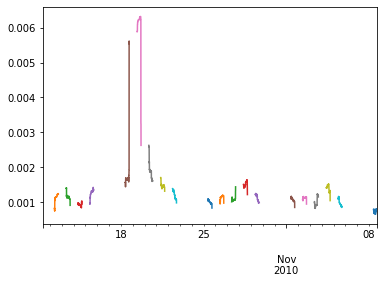

In [7]:
returns = aapl.Close.pct_change()
std_day = returns.rolling(95).std()
std_day.resample('B').plot();

## Data alignment

In [8]:
ts1 = pd.Series(np.random.rand(10), index=pd.date_range('2010-10-10', periods=10))
ts1

2010-10-10    0.037634
2010-10-11    0.091527
2010-10-12    0.873231
2010-10-13    0.104794
2010-10-14    0.347882
2010-10-15    0.475616
2010-10-16    0.658837
2010-10-17    0.194715
2010-10-18    0.811148
2010-10-19    0.952716
Freq: D, dtype: float64

In [9]:
ts2 = ts1[[0, 2, 4, 5, 7, 8, 9]]
ts2

2010-10-10    0.037634
2010-10-12    0.873231
2010-10-14    0.347882
2010-10-15    0.475616
2010-10-17    0.194715
2010-10-18    0.811148
2010-10-19    0.952716
dtype: float64

In [10]:
ts1 + ts2

2010-10-10    0.075268
2010-10-11         NaN
2010-10-12    1.746463
2010-10-13         NaN
2010-10-14    0.695765
2010-10-15    0.951232
2010-10-16         NaN
2010-10-17    0.389431
2010-10-18    1.622295
2010-10-19    1.905432
dtype: float64

In [11]:
df = pd.DataFrame({'A': ts1, 'B': ts2})
df

,A,B
2010-10-10,0.037634,0.037634
2010-10-11,0.091527,NaN
2010-10-12,0.873231,0.873231
2010-10-13,0.104794,NaN
2010-10-14,0.347882,0.347882
2010-10-15,0.475616,0.475616
2010-10-16,0.658837,NaN
2010-10-17,0.194715,0.194715
2010-10-18,0.811148,0.811148
2010-10-19,0.952716,0.952716


In [12]:
amd_bars = load_bars('AMD')

In [13]:
f1 = subsample(amd_bars)
f2 = subsample(tsla_bars)
f1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3600 entries, 2001-02-05 to 2016-12-30
Data columns (total 5 columns):
Open      3600 non-null float64
High      3600 non-null float64
Low       3600 non-null float64
Close     3600 non-null float64
Volume    3600 non-null int64
dtypes: float64(4), int64(1)
memory usage: 168.8 KB


In [14]:
both = pd.concat([f1, f2], axis=1, keys=['AMD', 'TSLA'])
both.head()

AMD                                 TSLA                      
             Open   High    Low  Close     Volume Open High Low Close Volume
Date                                                                        
2001-02-05  23.64  24.04  22.96  24.00  6051700.0  NaN  NaN NaN   NaN    NaN
2001-02-06  23.75  24.70  23.75  24.05  4136700.0  NaN  NaN NaN   NaN    NaN
2001-02-07  23.70  24.21  23.06  23.57  3803500.0  NaN  NaN NaN   NaN    NaN
2001-02-08  23.98  24.75  23.70  24.00  6493100.0  NaN  NaN NaN   NaN    NaN
2001-02-09  23.95  24.80  23.80  24.37  7580300.0  NaN  NaN NaN   NaN    NaN

## Missing data

In [15]:
df.head()

,A,B
2010-10-10,0.037634,0.037634
2010-10-11,0.091527,NaN
2010-10-12,0.873231,0.873231
2010-10-13,0.104794,NaN
2010-10-14,0.347882,0.347882


In [16]:
df.count()

A    10
B     7
dtype: int64

In [17]:
df.sum()

A    4.548102
B    3.692943
dtype: float64

In [18]:
df.mean(1)

2010-10-10    0.037634
2010-10-11    0.091527
2010-10-12    0.873231
2010-10-13    0.104794
2010-10-14    0.347882
2010-10-15    0.475616
2010-10-16    0.658837
2010-10-17    0.194715
2010-10-18    0.811148
2010-10-19    0.952716
dtype: float64

In [19]:
df.dropna()

,A,B
2010-10-10,0.037634,0.037634
2010-10-12,0.873231,0.873231
2010-10-14,0.347882,0.347882
2010-10-15,0.475616,0.475616
2010-10-17,0.194715,0.194715
2010-10-18,0.811148,0.811148
2010-10-19,0.952716,0.952716


In [20]:
df.fillna(0) # method='ffill'

,A,B
2010-10-10,0.037634,0.037634
2010-10-11,0.091527,0.000000
2010-10-12,0.873231,0.873231
2010-10-13,0.104794,0.000000
2010-10-14,0.347882,0.347882
2010-10-15,0.475616,0.475616
2010-10-16,0.658837,0.000000
2010-10-17,0.194715,0.194715
2010-10-18,0.811148,0.811148
2010-10-19,0.952716,0.952716


## Groupby operation

In [21]:
df = pd.DataFrame({'Momentum': np.random.randn(1000) / 200 + 0.03,
                   'Value': np.random.randn(1000) / 200 + 0.08,
                   'ShortInterest': np.random.randn(1000) / 200 - 0.02},
                 index=tickers.take(np.random.permutation(Nfull)[:1000]))
df.head()

,Momentum,Value,ShortInterest
ITTZS,0.027625,0.077598,-0.017736
ADFZM,0.036310,0.079167,-0.011027
WRHMN,0.021350,0.080267,-0.021218
VKWPN,0.029292,0.083394,-0.006308
JLPZI,0.028331,0.067340,-0.022168


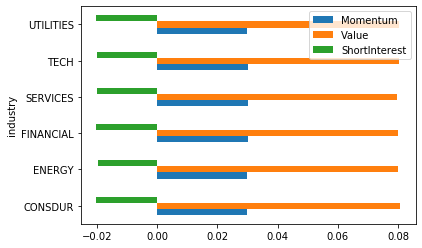

In [22]:
means = df.groupby(industries).mean()
means.plot(kind='barh');

In [23]:
means = df.groupby([industries, ccy]).mean()
means

Momentum     Value  ShortInterest
industry  ccy                                   
CONSDUR   EUR  0.029582  0.081042      -0.019651
          USD  0.030196  0.080481      -0.020873
ENERGY    EUR  0.031065  0.080331      -0.020125
          USD  0.029103  0.079447      -0.019063
FINANCIAL EUR  0.030515  0.080257      -0.019157
          USD  0.030136  0.079876      -0.021189
SERVICES  EUR  0.029708  0.080014      -0.019633
          USD  0.030452  0.079269      -0.020125
TECH      EUR  0.030051  0.079526      -0.020394
          USD  0.030406  0.080812      -0.019239
UTILITIES EUR  0.029994  0.079613      -0.020600
          USD  0.030009  0.080998      -0.019796

In [24]:
normed = df.groupby([industries, ccy]).apply(zscore)
normed.groupby([industries, ccy]).agg(['mean', 'std'])

Momentum              Value      ShortInterest     
                       mean  std          mean  std          mean  std
industry  ccy                                                         
CONSDUR   EUR  8.591012e-16  1.0 -1.649474e-15  1.0 -9.516197e-16  1.0
          USD -7.401487e-16  1.0  6.140387e-15  1.0  2.135044e-17  1.0
ENERGY    EUR  3.604082e-17  1.0  2.372895e-15  1.0  4.109482e-16  1.0
          USD -5.786629e-16  1.0  1.904686e-15  1.0  1.563619e-15  1.0
FINANCIAL EUR -5.471813e-16  1.0  4.731665e-15  1.0  1.514661e-15  1.0
          USD -3.367270e-16  1.0 -3.694237e-15  1.0 -8.588978e-16  1.0
SERVICES  EUR -6.716849e-16  1.0 -4.131764e-15  1.0 -2.193384e-15  1.0
          USD -5.674473e-17  1.0  1.147230e-15  1.0  2.662685e-15  1.0
TECH      EUR  1.468910e-15  1.0 -8.412074e-15  1.0 -1.615517e-15  1.0
          USD -8.425359e-16  1.0 -1.781291e-15  1.0  1.461794e-15  1.0
UTILITIES EUR  7.869935e-16  1.0  2.258390e-15  1.0 -1.618958e-15  1.0
          USD -3.755861e-16  1.0  3.892867e-15  1.0  6.755825e-16  1.0

## Hierarchical indexing

In [25]:
means

Momentum     Value  ShortInterest
industry  ccy                                   
CONSDUR   EUR  0.029582  0.081042      -0.019651
          USD  0.030196  0.080481      -0.020873
ENERGY    EUR  0.031065  0.080331      -0.020125
          USD  0.029103  0.079447      -0.019063
FINANCIAL EUR  0.030515  0.080257      -0.019157
          USD  0.030136  0.079876      -0.021189
SERVICES  EUR  0.029708  0.080014      -0.019633
          USD  0.030452  0.079269      -0.020125
TECH      EUR  0.030051  0.079526      -0.020394
          USD  0.030406  0.080812      -0.019239
UTILITIES EUR  0.029994  0.079613      -0.020600
          USD  0.030009  0.080998      -0.019796

In [26]:
means['Momentum']

industry   ccy
CONSDUR    EUR    0.029582
           USD    0.030196
ENERGY     EUR    0.031065
           USD    0.029103
FINANCIAL  EUR    0.030515
           USD    0.030136
SERVICES   EUR    0.029708
           USD    0.030452
TECH       EUR    0.030051
           USD    0.030406
UTILITIES  EUR    0.029994
           USD    0.030009
Name: Momentum, dtype: float64

In [27]:
means.loc['TECH']

,Momentum,Value,ShortInterest
ccy,,,
EUR,0.030051,0.079526,-0.020394
USD,0.030406,0.080812,-0.019239


In [28]:
means.stack()

industry   ccy               
CONSDUR    EUR  Momentum         0.029582
                Value            0.081042
                ShortInterest   -0.019651
           USD  Momentum         0.030196
                Value            0.080481
                ShortInterest   -0.020873
ENERGY     EUR  Momentum         0.031065
                Value            0.080331
                ShortInterest   -0.020125
           USD  Momentum         0.029103
                Value            0.079447
                ShortInterest   -0.019063
FINANCIAL  EUR  Momentum         0.030515
                Value            0.080257
                ShortInterest   -0.019157
           USD  Momentum         0.030136
                Value            0.079876
                ShortInterest   -0.021189
SERVICES   EUR  Momentum         0.029708
                Value            0.080014
                ShortInterest   -0.019633
           USD  Momentum         0.030452
                Value            0.079269
    

In [29]:
means.stack().unstack('industry')

industry            CONSDUR    ENERGY  FINANCIAL  SERVICES      TECH  \
ccy                                                                    
EUR Momentum       0.029582  0.031065   0.030515  0.029708  0.030051   
    Value          0.081042  0.080331   0.080257  0.080014  0.079526   
    ShortInterest -0.019651 -0.020125  -0.019157 -0.019633 -0.020394   
USD Momentum       0.030196  0.029103   0.030136  0.030452  0.030406   
    Value          0.080481  0.079447   0.079876  0.079269  0.080812   
    ShortInterest -0.020873 -0.019063  -0.021189 -0.020125 -0.019239   

industry           UTILITIES  
ccy                           
EUR Momentum        0.029994  
    Value           0.079613  
    ShortInterest  -0.020600  
USD Momentum        0.030009  
    Value           0.080998  
    ShortInterest  -0.019796

## Merging and joining

In [30]:
movies.head()  

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [31]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [32]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [33]:
data = pd.merge(pd.merge(ratings, users), movies)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
user_id       1000209 non-null int64
movie_id      1000209 non-null int64
rating        1000209 non-null int64
timestamp     1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null int64
occupation    1000209 non-null int64
zip           1000209 non-null object
title         1000209 non-null object
genres        1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [34]:
rating_counts = data.groupby('title').size()
freq_titles = rating_counts.index[rating_counts > 1000]

In [35]:
highest_rated = data.groupby('title').rating.mean()[freq_titles].sort_values()[-10:]
highest_rated

title
Sixth Sense, The (1999)                                                        4.406263
Casablanca (1942)                                                              4.412822
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)    4.449890
Star Wars: Episode IV - A New Hope (1977)                                      4.453694
Rear Window (1954)                                                             4.476190
Raiders of the Lost Ark (1981)                                                 4.477725
Schindler's List (1993)                                                        4.510417
Usual Suspects, The (1995)                                                     4.517106
Godfather, The (1972)                                                          4.524966
Shawshank Redemption, The (1994)                                               4.554558
Name: rating, dtype: float64

## Pivot tables

In [36]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings.tail(10)

gender,F,M
title,,
"Young Poisoner's Handbook, The (1995)",4.000000,3.532258
Young Sherlock Holmes (1985),3.514706,3.363344
Young and Innocent (1937),2.500000,3.500000
Your Friends and Neighbors (1998),2.888889,3.536585
Zachariah (1971),NaN,3.500000
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000
Zeus and Roxanne (1997),2.777778,2.357143


## Data summary and statistics

In [37]:
data.title.value_counts().head(10)

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Name: title, dtype: int64

In [38]:
data.rating.describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [39]:
by_gender = data.groupby('gender').rating.describe()
by_gender

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,246440.0,3.620366,1.111228,1.0,3.0,4.0,4.0,5.0
M,753769.0,3.568879,1.118724,1.0,3.0,4.0,4.0,5.0


In [40]:
by_gender.stack().unstack(0)

gender,F,M
count,246440.000000,753769.000000
mean,3.620366,3.568879
std,1.111228,1.118724
min,1.000000,1.000000
25%,3.000000,3.000000
50%,4.000000,4.000000
75%,4.000000,4.000000
max,5.000000,5.000000


# Questions